# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# I am using Jupyter Notebook, not Google Colab

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [5]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
df.shape

(1898, 9)

#### Observations:
The data comes with 1898 rows and 9 columns in total

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 5 numerical columns: order_id, customer_id, cost_of_the_oder, food_preparation_time, and delivery_time, with int or float data type
There are 4 categerical columns: restaurant_name, cuisine_type, day_of_the_week, and rating, with object data type

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# checking missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observation:
There are no missing values in all the variables.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observation:
Once an order is placed, the minimun, averge, and maximum time it takes for food to be prepared is 20.00, 27.37, and 35.00 minutes, respectively.


In [10]:
#Checking for duplicate entries in the data
df.duplicated().sum()
#df.duplicated().value_counts()

0

#### Obervation:
no duplicated values in the dataset.

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [12]:
df['rating'].nunique()

4

#### Observations:
There are 4 distinctive values in Rating column, with 736 orders are rated "not given". 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

##### order_id

In [13]:
df['order_id'].nunique()

1898

#### Obervation:
the number is the same as row count in Question 1, so each number in order_id is unique 

##### customer_id

In [14]:
df['customer_id'].nunique()

1200

In [15]:
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### Obervation:
There are 1200 distinctive values in customer_id, with some customers making multipel orders such as customer (52832) made 13 orders in total.

##### restaurant_name

In [16]:
df['restaurant_name'].nunique()

178

In [17]:
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Obervation:
There are 14 types of restaurants, with American having the most orders at 584

##### cuisine_type

In [18]:
df['cuisine_type'].nunique()

14

In [19]:
df['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

<Axes: xlabel='cuisine_type', ylabel='count'>

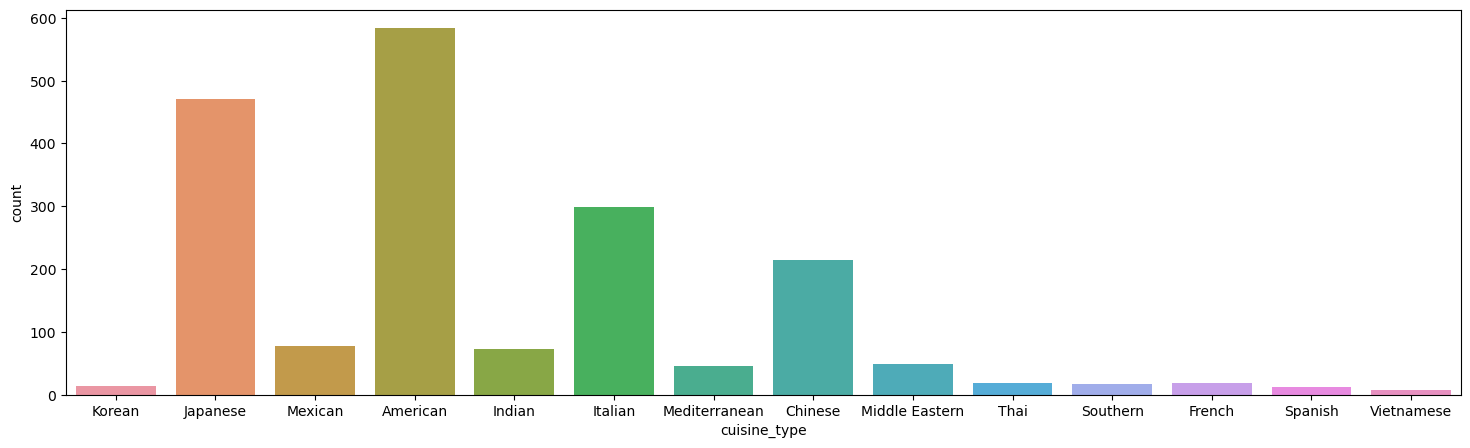

In [20]:
 ## Create a countplot for cuisine type.
plt.figure(figsize = (18,5))
sns.countplot(data = df, x = 'cuisine_type')

#### Observation:
There are 14 types of restaurants, with American having the most orders at 584

##### cost_of_ther_order

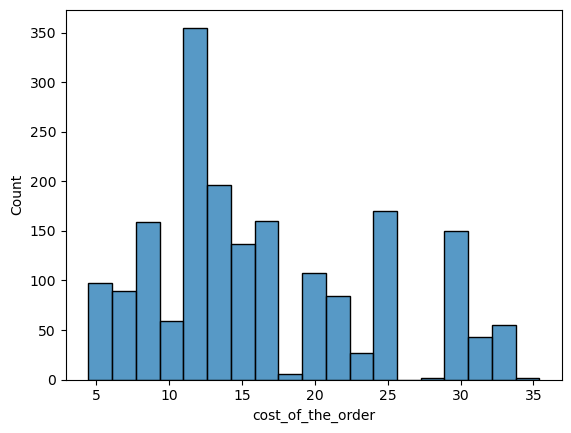

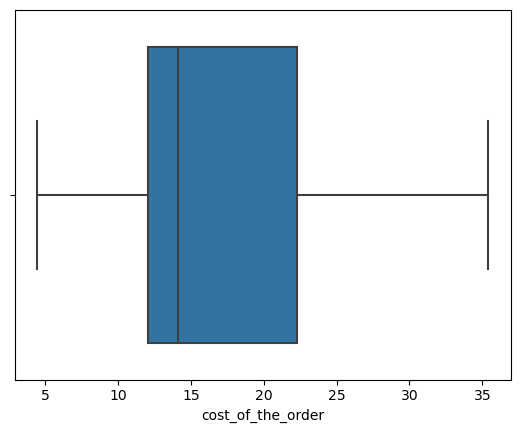

In [21]:
## Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order') 
plt.show()

 ## Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order')
plt.show() 

#### Observation:
 The distribution is skewed towards right.
 There are no outliers present in this column.
 50% of the order are at and below $14.14, with $12-13.00 received the most orders, with an average at $16.00.

##### day_of_the_week

In [22]:
df['day_of_the_week'].nunique()

2

In [23]:
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

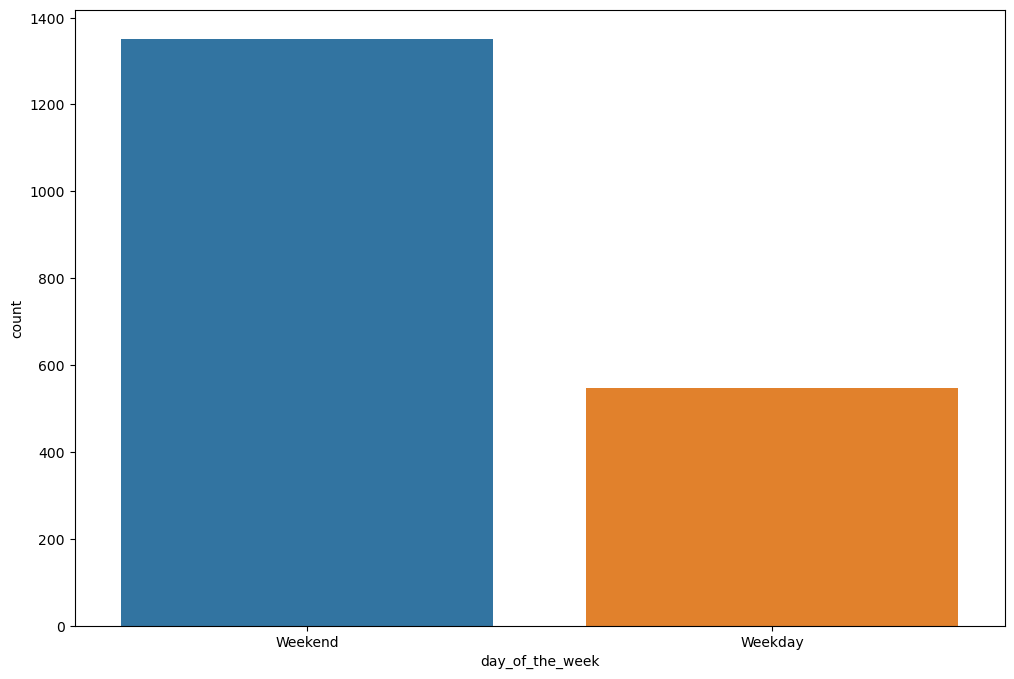

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='day_of_the_week');

#### Observation:
Most of the orders occur over the weekend, almost 3 time more than the weekdays.

##### rating

In [25]:
df['rating'].nunique()

4

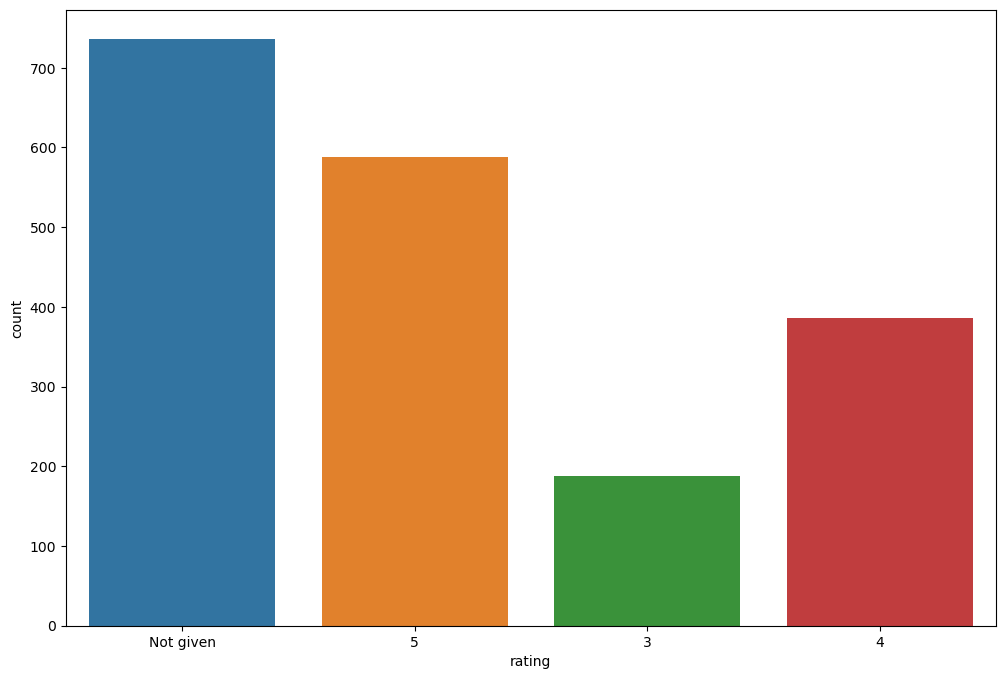

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='rating');

##### food_preparation_time

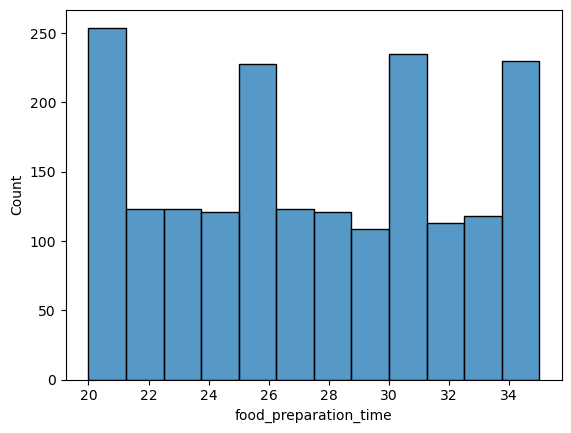

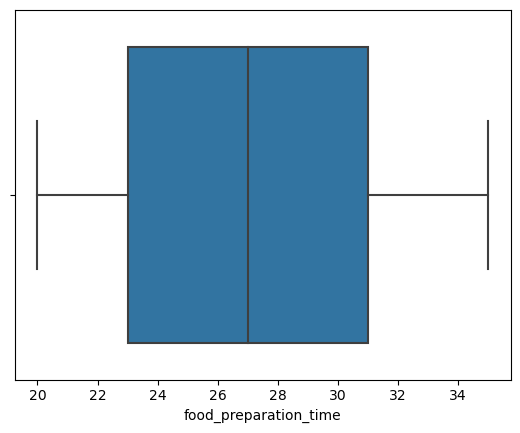

In [27]:
## Histogram for the food_preparation_time
sns.histplot(data=df,x='food_preparation_time') 
plt.show()

 ## Boxplot for the food_prepartion_time
sns.boxplot(data=df,x='food_preparation_time')
plt.show() 

#### Observation:
The average time for food prepartion time is around 27, no outliers, quite even distributed with minimum and maximum time at 20 and 37, respectively.

##### delivery_time

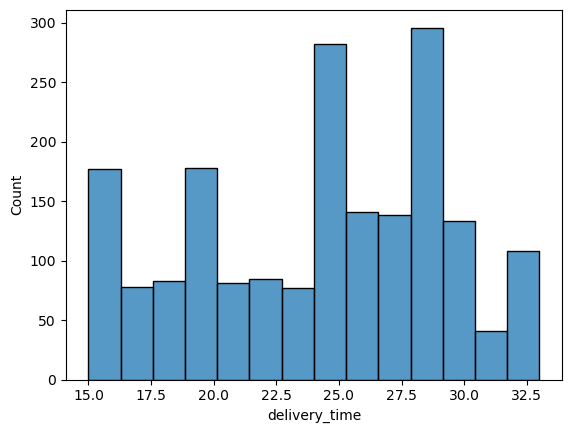

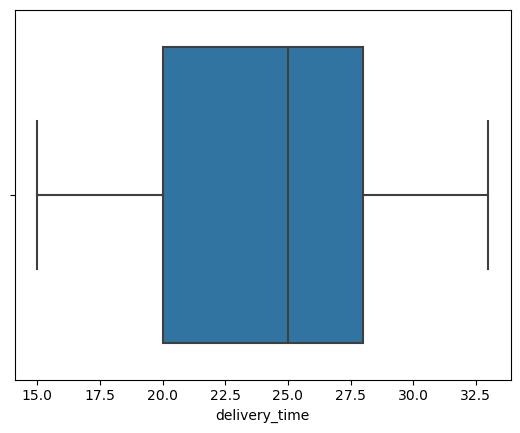

In [28]:
## Histogram for the delivery_time
sns.histplot(data=df,x='delivery_time') 
plt.show()

 ## Boxplot for the delivery_time
sns.boxplot(data=df,x='delivery_time')
plt.show() 

#### Observations
The average time for food delivery time is around 25, no outliers, quite even distributed with minimum and maximum time at 20 and 28, respectively.

### Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [29]:
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations:
In term of orders received, the top five restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [30]:
# Get all the order data on weekends:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
# check value counts for the cuisine type on weekend
df_weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
 The most popular cuisine on weekend is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [31]:
df[df['cost_of_the_order'] > 20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [32]:
df[df['cost_of_the_order']>20].shape[0] / df.shape[0]

0.2924130663856691

#### Observations:
The percentage of order cost more than 20 is at 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [33]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [50]:
# Alternative method:
mean_delivery_time = df['delivery_time'].mean()
# print(mean_delivery_time)
print('The mean delivery time is ', round(mean_delivery_time, 2), 'minutes')

The mean delivery time is  24.16 minutes


#### Observations:
The mean delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [51]:
df['customer_id'].value_counts().head()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64

#### Observations:
 The top 3 most frequent customers (with their respective orders) are 52832 (13), 47440 (10), and 83287 (9).

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
#Need to get the numerical data only for the analysis
df_numerical = df[['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']]
df_numerical



##### correlation among numerical variables (exclusing order_id and customer_id)

In [ ]:
df_num = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]
df_num

In [ ]:
corr = df_num.corr()
print (corr)

In [ ]:
# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
sns.pairplot(data=df_num, diag_kind="kde")
plt.show();

### Observation:
 there are no apparent correlation among these numerical variables.

##### correlation among numerical and categorical variables (exclusing order_id and customer_id)

In [ ]:
# cuisine_type vs cost_of_the_order
plt.figure(figsize=(12,5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'BuGn')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
# cuisine_type vs food_preparation_time
plt.figure(figsize=(12,5))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'BuGn')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
# cuisine_type vs delivery_time
plt.figure(figsize=(12,5))
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df, palette = 'BuGn')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
# day_of_the_week vs delivery_time
plt.figure(figsize=(12,5))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'BuGn')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
# day_of_the_week vs food_preparation_time
plt.figure(figsize=(12,5))
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df, palette = 'BuGn')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
# rating and delivery time
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

In [ ]:
# rating and food_preparation_time
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

In [ ]:
# rating and cot_of_the_order
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [36]:
# Remove those record with rating of "Not Gvien" and only keep those with a valid rating (3,4,and 5)
df_valid_rated = df[df['rating'] != 'Not given'].copy()
df_valid_rated

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [38]:
# Convert rating column from object to integer
df_valid_rated['rating'] = df_valid_rated['rating'].astype('int')
df_valid_rated.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int32  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 86.2+ KB


In [39]:
# Group the valid rating df by restaurant names and count the value for each restaurant
df_valid_rated_count = df_valid_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False)
df_valid_rated_count

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
                            ... 
Frank Restaurant               1
Socarrat Paella Bar            1
El Parador Cafe                1
Lucky Strike                   1
'wichcraft                     1
Name: rating, Length: 156, dtype: int64

In [40]:
restaurant_ratings = df_valid_rated.groupby('restaurant_name').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
)

In [41]:
restaurant_ratings

,average_rating,rating_count
restaurant_name,,
'wichcraft,5.000000,1
12 Chairs,4.500000,2
5 Napkin Burger,4.000000,2
67 Burger,5.000000,1
Amma,4.500000,2
...,...,...
Zero Otto Nove,4.000000,1
brgr,3.000000,1
da Umberto,5.000000,1


In [44]:
qualified_restaurants = restaurant_ratings[
    (restaurant_ratings['average_rating'] > 4) & (restaurant_ratings['rating_count'] > 50)
]
qualified_restaurants

,average_rating,rating_count
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


In [45]:
# creat a new data frame with rating_count column grouping by restaurant name
rating_counts = df_valid_rated.groupby('restaurant_name')['rating'].count().sort_values(ascending = False).reset_index(name='rating_count')
rating_counts

,restaurant_name,rating_count
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [46]:
# creat another data frame with averge_ratings column grouping by restaurant name
average_ratings = df_valid_rated.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).reset_index(name='average_rating')
average_ratings

,restaurant_name,average_rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
151,Woorijip,3.0
152,Byblos Restaurant,3.0
153,Pepe Giallo,3.0
154,Sushi Choshi,3.0


In [47]:
#Merger these two new dataframe to create a new dataframe based on restaurant name:
merged_df = pd.merge(rating_counts, average_ratings, on='restaurant_name')
merged_df

,restaurant_name,rating_count,average_rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125
4,RedFarm Broadway,41,4.243902
...,...,...,...
151,Frank Restaurant,1,4.000000
152,Socarrat Paella Bar,1,5.000000
153,El Parador Cafe,1,5.000000
154,Lucky Strike,1,4.000000


In [48]:
# the restaurants must have a rating count of more than 50 and the average rating should be greater than 4.
filtered_restaurants = merged_df[(merged_df['rating_count'] > 50) & (merged_df['average_rating'] > 4)]
filtered_restaurants

,restaurant_name,rating_count,average_rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
Only 4 restaurants satisfy the condition and will receive the promotion offer: Shake Shack, The Meatball Shop, BlueRibbon Sushi, and Blue Ribbon Fried Chicken.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# creat a function to determine the revenue and add a new column "revenue" to the data frame
def compute_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_revenue)
df.head()

In [ ]:
# calculate the total revenue and print it out
total_revenue = df['Revenue'].sum()
print('The net revenue is around', round(total_revenue, 2), 'dollars')

#### Observations:
 The net revenue from generated from all the order is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total time and add a new column to the dataframe df to store total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

In [ ]:
df[df['total_time']>60].shape[0] / df.shape[0]

#### Observations:

about 10.54% of the orders takes more than 60 minutes to get prepared and delivered to the customer


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
#calculate the average delivery time by grouping day_of_the_week:
average_delivery_time  = df.groupby('day_of_the_week')['delivery_time'].mean().sort_values(ascending = False)
average_delivery_time


#### Observations:

 It took 28.34 minutese to deliver on average over the weekday, while it took 22.47 minutes on average over the weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
The Dataset from FoodHub has been analysed to understand the variable correlations and trend of categories, which can be beneficial for the company. With the help of descriptive analysis and visualisations, some insights have been drawn as below:  

1	There are a total of 9 columns, with 5 numeical and 4 categorical variable, in the dataset.  
2	The data is clean, there are no missing values in the entire dataset.  
3	There no duplicated values in the dataset.  
4	There are 4 distinctive values in Rating column, with 736 orders are rated "not given". This is the area for special attention when conduct rating related data analysis.   
5	There are 14 cusine types, with Amerian, Japanese, and Italian as the top three receving the most orders. Most of the orders occur over the weekend, almost 3 time more than the weekdays.  
6	50% of the order are at and below $14.14, with $12-13.00 received the most orders, with an average at $16.00. The percentage of order cost more than 20 is at 29.24 percent.  
7	The top 3 most frequent customers (with their respective orders) are 52832 (13), 47440 (10), and 83287 (9).  
8	The average time for food prepartion time is around 27, no outliers, quite even distributed with minimum and maximum time at 20 and 37, respectively. The average time for food delivery time is around 24.16, no outliers, quite even distributed with minimum and maximum time at 20 and 28, respectively.  
9	As expected, the delivery time for weekdays is significantly longer than that of weekend. It took 28.34 minutese to deliver on average over the weekday, while it took 22.47 minutes on average over the weekend.And about 10.54 percent of the orders takes more than 60 minutes to get prepared and delivered to the customer.

### Recommendations:

1	American cuisine, it seems to be low, the company can consider to add additional type of foods to attract mroe customers.  
2	The most frequent customer has 13 purchases. This number seems to be low. The company can consider to drive loyalty and return customers by memembership or other promotion efforts.  
3	There are 736 "not given" in 1898 total rating records, almost 40% of the customer didn't provide ratign feedback. This is unusually high. The company needs to take steps to address this issue through points or coupons to encourage customers to give feedbacks. follow-up email could be another mean to drive up feedbacks rate.  
4	It takes longer to delivery over weekdays than weekend, so the delivery resource availability should be ensured during weekdays to speed up the delivery.  
5	Data should be procured for weather conditions to get a better understanding of the impact from weather on delivery time and order amounts from customers.  
	
